In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [4]:
zoo  = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


Data exploration and visualizaion

correlation matrix 

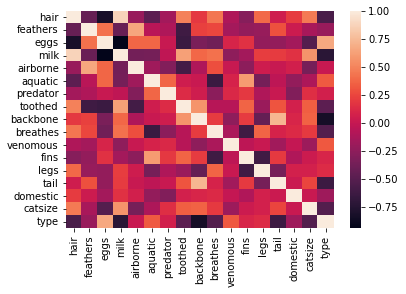

In [7]:
cor = zoo.corr()
sns.heatmap(cor)
plt.show()

Scatter plot of two features, and pairwise plot

In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo.drop("animal name",axis=1,inplace=True)

In [10]:
color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in zoo.hair]

With this set function we find unique values in a list...

In [11]:
unique_list = list(set(color_list))
unique_list

['blue', 'red']

Plotting scatter matrix

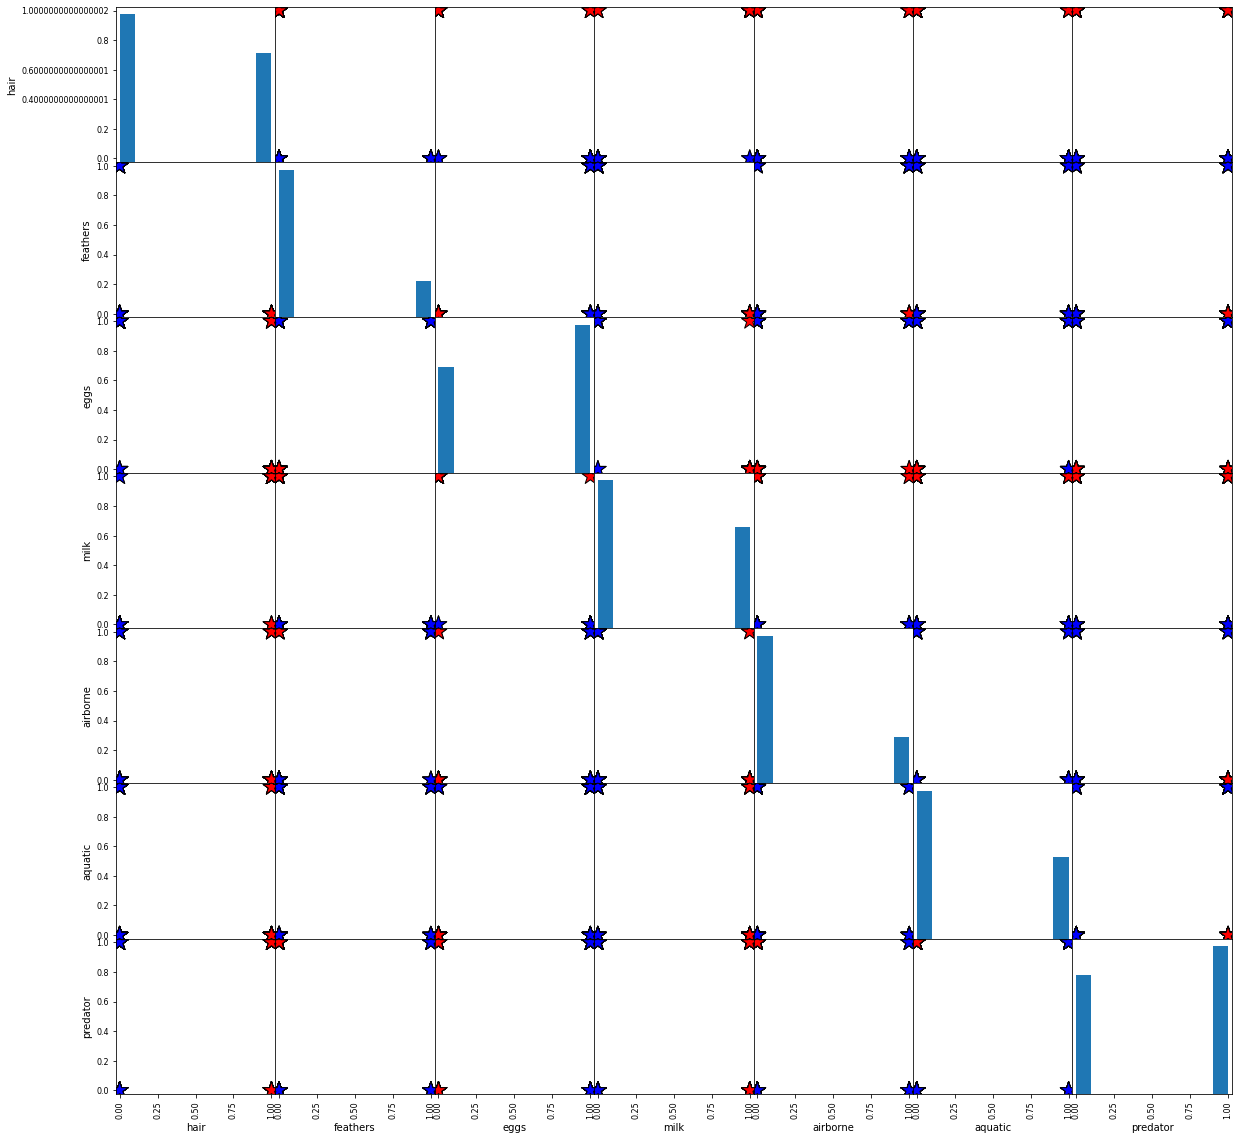

In [12]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Visualizing has hair or not ?

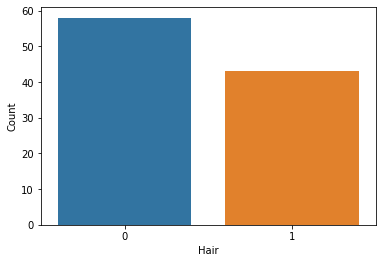

0    58
1    43
Name: hair, dtype: int64

In [13]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.967741935483871


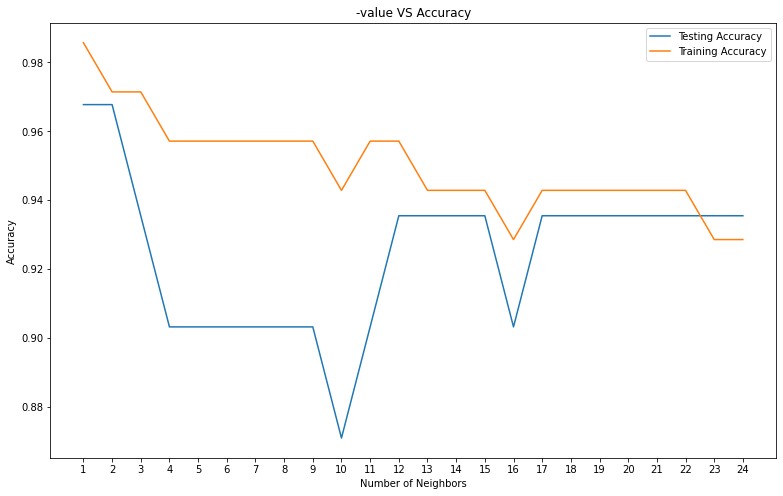

Best accuracy is 0.967741935483871 with K = 1


In [16]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Visualizing Eggs and Hair on Scatter

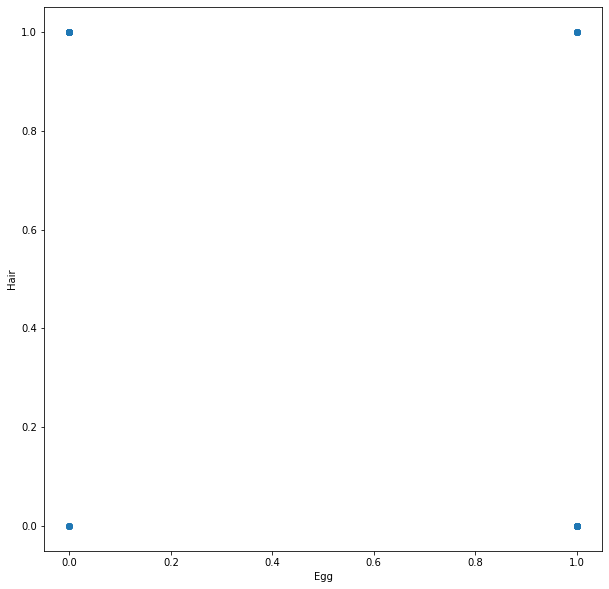

In [17]:
x = np.array(zoo.loc[:,"eggs"]).reshape(-1,1)
y = np.array(zoo.loc[:,'hair']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Hair')
plt.show()

Linear Regression

Plotting regression line and scatter

R^2 Score:  0.6681125904754137


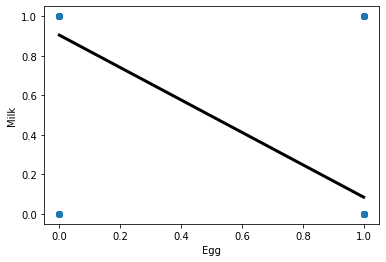

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
regression.fit(x,y)
predicted = regression.predict(predict_space)

print("R^2 Score: ",regression.score(x,y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Milk')
plt.show()

Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
k=5
cv_result = cross_val_score(regression,x,y,cv=k)
print("CV Scores: ",cv_result)
print("CV Average: ",np.sum(cv_result)/k)

CV Scores:  [0.80171562 0.61914032 0.79243817 0.24939434 0.76176534]
CV Average:  0.6448907578047475


Ridge

In [20]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha= 0.001,normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge Score: ",ridge.score(x_test,y_test))

Ridge Score:  0.9302397279928529


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Lasso

In [21]:
from sklearn.linear_model import Lasso
x = np.array(zoo.loc[:,['eggs','airborne','fins','legs',"hair","type"]])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999970989932222
Lasso coefficients:  [-0.         -0.         -0.          0.          0.99830154 -0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1 )
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confisuon Matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confisuon Matrix: 
 [[15  0]
 [ 0 16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



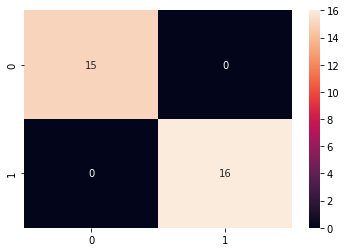

In [23]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()